In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import img_to_array,load_img
import csv

Using TensorFlow backend.


In [2]:
import os

#specifying necessary directories

INPUT_DIR = 'whale-categorization-playground'
train_dir = 'whale-categorization-playground/train/'
train_files = os.listdir(train_dir)
train_files.sort()
test_files = os.listdir('whale-categorization-playground/test/')
print('no. of files in \ntrain :- ',len(train_files),'\ntest :- ',len(test_files))

no. of files in 
train :-  9850 
test :-  15610


In [3]:
df = pd.read_csv("whale-categorization-playground/train.csv")
df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [4]:
df.tail()

,Image,Id
9845,ffe5c306.jpg,w_2ceab05
9846,ffeaa7a4.jpg,w_b067417
9847,ffecec63.jpg,w_8b56cb1
9848,fff04277.jpg,w_2dcbf82
9849,fffd4260.jpg,w_b9bfd4e


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 2 columns):
Image    9850 non-null object
Id       9850 non-null object
dtypes: object(2)
memory usage: 154.0+ KB


In [6]:
len(df['Id'].unique())

4251

**Thus there are total 4251 classes in 9850 images**<br>
**this gives us an idea that the no. of samples for a class are going to be very less**

In [7]:
id_count = df.groupby('Id').size().sort_values(ascending = False)
id_count

Id
new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
w_fd1cb9d     22
w_ab4cae2     22
w_693c9ee     22
w_73d5489     21
w_43be268     21
w_987a36f     21
w_f19faeb     20
w_95874a5     19
w_9b401eb     19
w_b7d5069     18
w_c0d494d     18
w_18eee6e     17
w_0e737d0     17
w_eb0a6ed     17
w_dbda0d6     17
w_67de30b     16
w_6c803bf     16
w_b0e05b1     16
w_a59905f     16
w_17ee910     16
w_cae7677     15
w_89e159a     15
w_ee17a08     15
w_9ca943b     15
w_540fd73     14
            ... 
w_62ec01b      1
w_62d76c2      1
w_b1a4f29      1
w_62c6a8c      1
w_b1a8107      1
w_f460394      1
w_62aed54      1
w_b1acbb9      1
w_b1c44fe      1
w_b1c5e71      1
w_6257bdf      1
w_6315bc6      1
w_f43935f      1
w_636638f      1
w_640f91d      1
w_6460698      1
w_6443ad1      1
w_e9f85b7      1
w_642de28      1
w_b0fde68      1
w_6418af0      1
w_63fc906      1
w_6375873      1
w_f4219e3      1
w_63d5016      1
w_b170173      1
w_639aed5      1
w_6398e9d  

**Thus we can see that there are a large no. of unclassified whales ie. newclass<br>
a few classes have more than 10 samples and the rest have as few as 1samples.**

In [8]:
def plot_images_for_filenames(filenames, labels, rows=4):
    imgs = [plt.imread(f'{INPUT_DIR}/train/{filename}') for filename in filenames]
    
    return plot_images(imgs, labels, rows)
    
        
def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

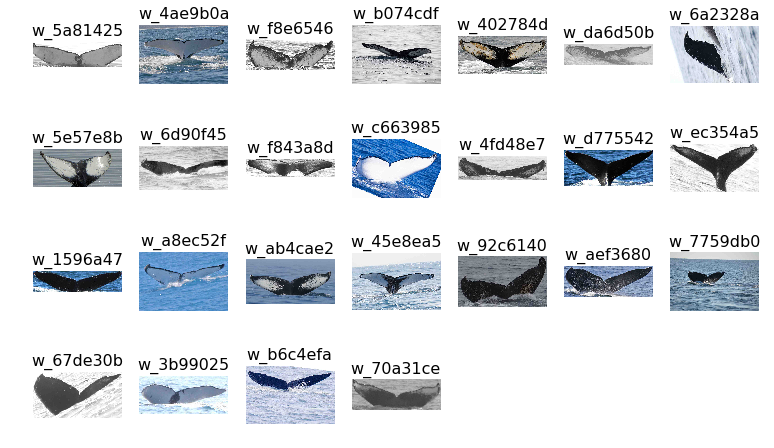

In [9]:
rand_rows = df.sample(frac=1.)[:25]
imgs = list(rand_rows['Image'])
labels = list(rand_rows['Id'])

plot_images_for_filenames(imgs, labels)

In [7]:
height = 100
width = 100
channels = 2

In [8]:
file_to_train = np.array(df['Image'])
y_train = np.array(df['Id'])
file_to_train    

array(['00022e1a.jpg', '000466c4.jpg', '00087b01.jpg', ...,
       'ffecec63.jpg', 'fff04277.jpg', 'fffd4260.jpg'], dtype=object)

In [9]:
y_train

array(['w_e15442c', 'w_1287fbc', 'w_da2efe0', ..., 'w_8b56cb1',
       'w_2dcbf82', 'w_b9bfd4e'], dtype=object)

In [10]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_train = onehot_encoder.fit_transform(integer_encoded)
print(y_train.shape)

(9850, 4251)


C:\Users\prath\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
X_train = None
X_train = np.ndarray(shape = (len(file_to_train),height,width,channels), dtype = np.float32)
print(X_train.shape)

(9850, 100, 100, 2)


In [33]:
i = 0

for image in file_to_train:
    img = Image.open('whale-categorization-playground/train/'+image).convert('LA')
    img = img.resize((height,width),Image.ANTIALIAS)
    x = img_to_array(img)/255
    x = x.reshape(height,width,channels)
    X_train[i] = x
    i += 1
    
print("Train Data Ready....")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800


In [67]:
print(X_train.shape,y_train.shape)

(9850, 100, 100, 2) (9850, 4251)


In [68]:
from  keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,# randomly shift images vertically (10% of total height)
    rotation_range = 45,
    horizontal_flip=True,) # randomly flip images horizontally

# fit augmented image generator on data
datagen.fit(X_train)

C:\Users\prath\Anaconda3\envs\virtual_platform\lib\site-packages\keras_preprocessing\image.py:1213: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (9850, 100, 100, 2) (2 channels).
  ' channels).')


In [69]:
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.layers import GlobalAveragePooling2D

from keras.layers.normalization import BatchNormalization

In [72]:
model = Sequential()
model.add(BatchNormalization(input_shape=(100, 100, 2)))
model.add(Conv2D(filters=16, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))  
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())


model.add(GlobalAveragePooling2D())

model.add(Dense(4251, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 100, 100, 2)       8         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 98, 98, 16)        304       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 49, 49, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 23, 23, 32)        128       
__________

In [73]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 50
batch_size = 20

checkpointer = ModelCheckpoint(filepath='whale_humpback1.hdf5', 
                               verbose=1, save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss',patience=5)#,restore_best_weights=True)

### Using Image Augmentation
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, callbacks=[earlystopping, checkpointer], verbose=1)

--------------------------------------------------- **Training done on Google Colab** -----------------------------------------------

In [90]:
model.load_weights("whale_humpback1.hdf5")
loss,acc = model.evaluate(X_train, y_train)
print("accuracy: ",acc,"\nloss :- ",loss)

9850/9850 [==============================] - 33s 3ms/step
accuracy:  0.8871065989121568 
loss :-  0.3857464258985471


In [12]:
test = np.array(test_files)
test_pred = pd.DataFrame(test_files, columns = ['Image'])
test_pred.head()

,Image
0,00029b3a.jpg
1,0003c693.jpg
2,000bc353.jpg
3,0010a672.jpg
4,00119c3f.jpg


In [13]:
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15610 entries, 0 to 15609
Data columns (total 1 columns):
Image    15610 non-null object
dtypes: object(1)
memory usage: 122.0+ KB


In [14]:
X_test = None
X_test = np.ndarray(shape = (len(test),height,width,channels), dtype = np.float32)
print(X_test.shape)

(15610, 100, 100, 2)


In [15]:
test

array(['00029b3a.jpg', '0003c693.jpg', '000bc353.jpg', ...,
       'fffa5100.jpg', 'fffa6215.jpg', 'ffffdd7f.jpg'], dtype='<U12')

In [17]:
i = 0

for image in test:
    img = Image.open('whale-categorization-playground/test/'+image).convert('LA')
    img = img.resize((height,width),Image.ANTIALIAS)
    x = img_to_array(img)/255
    x = x.reshape(height,width,channels)
    X_test[i] = x
    i += 1

0
2000
4000
6000
8000
10000
12000
14000


In [20]:
model = Sequential()
model.add(BatchNormalization(input_shape=(100, 100, 2)))
model.add(Conv2D(filters=16, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))  
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())

model.add(Dense(4251, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 100, 100, 2)       8         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 16)        304       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 49, 49, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 23, 23, 32)        128       
__________

In [77]:
model.load_weights("whale_humpback1.hdf5")

predictions = model.predict(X_test,verbose = 1)

15610/15610 [==============================] - 60s 4ms/step


In [78]:
predictions.shape

(15610, 4251)

In [79]:
predictions

array([[9.5598131e-01, 6.7179265e-08, 5.0449202e-15, ..., 7.3474794e-17,
        3.3352340e-18, 1.7908872e-14],
       [1.9549742e-02, 8.3966888e-13, 1.3207831e-12, ..., 1.0475067e-13,
        8.4985843e-13, 5.5887146e-11],
       [3.6693849e-02, 4.8784067e-08, 7.1247223e-11, ..., 1.9298008e-18,
        7.1894016e-22, 1.7373891e-13],
       ...,
       [3.5062429e-01, 8.9063462e-08, 3.2529570e-07, ..., 6.8595868e-06,
        6.2357663e-10, 8.7460129e-11],
       [3.3723858e-01, 1.7430304e-07, 3.4311497e-12, ..., 2.3732942e-09,
        7.4583212e-10, 8.9400265e-09],
       [1.1728754e-02, 2.0245838e-09, 2.2882380e-12, ..., 1.5660936e-11,
        1.5708835e-11, 4.8974744e-14]], dtype=float32)

In [81]:
predictions[0]

array([9.5598131e-01, 6.7179265e-08, 5.0449202e-15, ..., 7.3474794e-17,
       3.3352340e-18, 1.7908872e-14], dtype=float32)

In [82]:
i=0
results = []
for j in range(15610):
    class_prob = predictions[j]
    top_values_index = sorted(range(4251), key=lambda i: class_prob[i])[-5:]
    
    x1 = np.zeros((4251,1))
    x2 = np.zeros((4251,1))
    x3 = np.zeros((4251,1))
    x4 = np.zeros((4251,1))
    x5 = np.zeros((4251,1))
    
    x[top_values_index[4]]=1
    x2[top_values_index[3]]=1
    x3[top_values_index[2]]=1
    x4[top_values_index[1]]=1
    x5[top_values_index[0]]=1
    
    tags = [label_encoder.inverse_transform([np.argmax(x)])[0],
            label_encoder.inverse_transform([np.argmax(x2)])[0],
            label_encoder.inverse_transform([np.argmax(x3)])[0],
            label_encoder.inverse_transform([np.argmax(x4)])[0],
            label_encoder.inverse_transform([np.argmax(x5)])[0]]           
    i+=1
    results.append(tags)

0
2000
4000
6000
8000
10000
12000
14000


In [83]:
data = pd.DataFrame(columns = ['Image','Id'])
for i in range(15610):
    pred = ""
    pred = results[i][0] + " " + results[i][1] + " " + results[i][2] + " " + results[i][3] + " " + results[i][4]
    data.loc[i] = [test[i],pred]

In [84]:
data.head()

,Image,Id
0,00029b3a.jpg,new_whale w_dbf4e7f w_17a0832 w_dd76ce2 w_1127c35
1,0003c693.jpg,w_0b775c1 w_9cb529f w_3bc8a47 w_cc1f8bc new_whale
2,000bc353.jpg,w_0e737d0 w_c71115a w_441bd21 new_whale w_b7ea0df
3,0010a672.jpg,new_whale w_3694c7d w_80bae3a w_e826a6f w_16ea0b2
4,00119c3f.jpg,new_whale w_2ac83b0 w_6545984 w_1d17e8c w_53baa9b


In [85]:
data.to_csv('preds1.csv',index=False)